<a href="https://colab.research.google.com/github/jtracos/Helper/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Modelo de regresión lineal</h2>

In [2]:
#librerias necesarias para este caso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, pipeline

<p>
  <span>Se puede implementar usando <b>scikit-learn</b> que, a pesar de su complejidad, es muy flexible y puede resultar útil al  desarrollar modelos estadísticos más complejos.</span>
</p>
<p>La documentación de este módulo está muy bien organizada y se encuentra <a href="https://scikit-learn.org/stable/index.html"> aquí</a></p>
<p>A continuación se muestra un ejemplo simple para un modelo de regresión polinomial</p>

<p>Generamos los datos para realizar las estimaciones del modelo.</p>
<p>Usaremos un modelo polinomial de segundo orden</p>

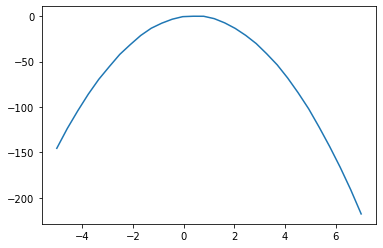

In [8]:
x = np.linspace(-5,7, 30)# shape(30,)=>shape(30,1)
x= x.reshape(x.shape[0],1) #el método reshape permite alterar las dimensiones de cualquier arreglo de numpy, si es posible hacerlo

#el metodo squeeze regresa a una dimension cualquier matriz
y = -1 + 4*x.squeeze() - 5*x.squeeze()**2 + np.random.random(x.shape[0])
_ = plt.plot(x,y)

<p><i>sklearn</i> divide sus métodos en dos partes 
<ul>
<li>transformers</li>
y
<li>estimadores</li>
</ul>
</p>
<p>Los <b>transformadores</b> son métodos que permiten <i>transformar</i> los datos de una manera util. Estos tienen dos métodos esenciales
<ul>
<li>fit</li>
Este método permite realizar la estimacion de los párametros necesarios para las transformación de las entradas
<li>transform</li>
Este métodos realiza como tal las transformaciones necesarias a las entradas, normalmente se usa después del método anterior
</ul>
</p>

<p>
Los <b>estimadores</b> incluyen dos metodos esenciales
<ul>
<li>fit</li>
Este método realiza las estimaciones requeridas de los parámetros del modelo.
<li>predict</li>
Sirve para realizar predicciones con el modelo final, 
</ul>
</p>

In [4]:
#transformacion de los datos para un polinomio de 3 grado
ft_trans = preprocessing.PolynomialFeatures(degree=2)
#modelo de regresion lineal
modelo = linear_model.LinearRegression(fit_intercept=False)

In [5]:
ft_trans.fit(x)

PolynomialFeatures()

In [6]:
x_trans = ft_trans.transform(x)

In [ ]:
modelo = modelo.fit(x_trans,y)

In [ ]:
y_pred = modelo.predict( x_trans)

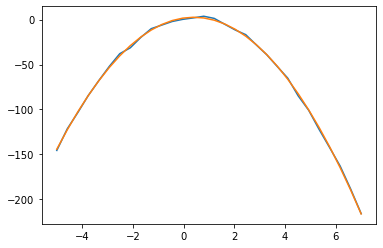

In [ ]:
plt.plot(x,y, x, y_pred)

<h3>Pipelines</h3>
<p>Útiles cuando se requieren aplicar multiples transformaciones y estimaciones a un modelos. Al usar pipelines se usan los métodos similares a aquellos de los estimadores </p>

In [ ]:
pipe = pipeline.Pipeline([("Transformer",ft_trans), 
                          ("modelo", modelo)])

In [ ]:
#el método named_steps contiene en un diccionario con los transformers y estimators en el pipeline
#estos se pueden extraer con el nombre que le dimos
pipe.named_steps["Transformer"]

PolynomialFeatures()

In [ ]:
pipe = pipe.fit(x,y)

In [ ]:
y_pred = pipe.predict(x)

In [ ]:
modelo.coef_

array([-1.,  4., -5.])

<h2>statsmodels</h2>
<h3>Modelos estadísticos</h3>
<p><b>statsmodels</b> permite general modelos de forma rápida incluyendo los estadísticos vitales para un análisis posterior del modelo.</p>
<h3>Regresión polinomial</h3>
<p>Para realizar una regresión polinomial puede efectuarse la transformación de la variable predictora, justo como en el caso anterior y realizar el modelado con statmodels. A continuación se muestra un breve ejemplo</p>

In [7]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p>Realizamos la transformación de los datos para un polinomio de grado 2 usando los mismos datos</p>

In [15]:
#transformacion de los datos para un polinomio de 2 grado
ft_trans = preprocessing.PolynomialFeatures(degree=2)
x_trans = ft_trans.fit_transform(x)

x_trans.shape

(30, 3)

<span>En este caso, el nucleo del trabajo es la transformación de la variable predictora para el modelo polinomial</span>

In [10]:
#estimacion del modelo polinomial
modelo = sm.OLS(y,x_trans).fit()

In [11]:
y_pred = modelo.predict(x_trans)

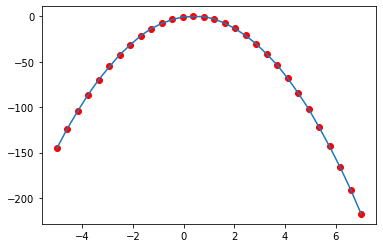

In [13]:
plt.plot(x,y)
_ = plt.scatter(x, y_pred, c= "red")

<span>Resumen estadístico del modelo</span>
<p>
<ul>
<li><b>const</b></li>
La ordenada al origen
<li><b>x1</b></li>
parámetro de la parte lineal del modelo
<li><b>x2</b></li>
parámetro de la parte cuadrática del modelo
</ul>
</p>

In [17]:
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.421e+05
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.02e-64
Time:                        16:12:28   Log-Likelihood:                -2.2432
No. Observations:                  30   AIC:                             10.49
Df Residuals:                      27   BIC:                             14.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5616      0.073     -7.643      0.0